In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
from sklearn import preprocessing 

In [2]:
path='C:/Users/FT-LT74/Desktop/notes/github/time-series-forecasting-store-sales/data/interim/'
#path='C:/Users/jiahu/Desktop/Data Science Sample Prac/github_repos/time-series-forecasting-store-sales/data/interim/'

In [3]:
df=pd.read_csv(path+'merged_df.csv')
df

C:\Users\FT-LT74\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008775 entries, 0 to 3008774
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 390.2+ MB


## Date

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [6]:
df['Year']=df['date'].dt.year

In [7]:
df['Month']=df['date'].dt.month

In [8]:
df['Day']=df['date'].dt.day

Monday=0, Sunday=6

In [9]:
df['DayofWeek']=df['date'].dt.dayofweek

## check transferred holiday

In [10]:
df.head(2)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,dcoilwtico,holiday_type,locale,locale_name,description,transferred,Year,Month,Day,DayofWeek
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1


In [ ]:
df[df['transferred']==True]

In [ ]:
df['holiday_type'].unique()

In [ ]:
type(df['holiday_type'])

In [ ]:
df[df['holiday_type'].astype(str).isin(['Work Day', np.nan])]['holiday_type'].unique()

In [11]:
def check_holiday(x):
    if x['transferred']==True or x['holiday_type']=='Work Day':
        return 0
    elif str(x['holiday_type']).lower()=='nan': 
        return 0
    else: 
        return 1

In [12]:
df['Is_Holiday_Celebrated'] = df.apply(check_holiday, axis=1)

In [13]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,NaN,2017,8,15,1,0
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,NaN,2017,8,15,1,0
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,NaN,2017,8,15,1,0
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,NaN,2017,8,15,1,0


In [ ]:
df[df['Is_Holiday_Celebrated']==0]['holiday_type'].unique()

In [ ]:
df[df['Is_Holiday_Celebrated']==1].shape

In [ ]:
df[df['Is_Holiday_Celebrated']==0].shape

In [14]:
# checking
df[(df['Is_Holiday_Celebrated']==0) & (df['holiday_type']=='Holiday')]

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated
500775,500742,2013-10-09,1,AUTOMOTIVE,5.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Independencia de Guayaquil,True,2013,10,9,2,0
500776,500743,2013-10-09,1,BABY CARE,0.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Independencia de Guayaquil,True,2013,10,9,2,0
500777,500744,2013-10-09,1,BEAUTY,0.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Independencia de Guayaquil,True,2013,10,9,2,0
500778,500745,2013-10-09,1,BEVERAGES,913.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Independencia de Guayaquil,True,2013,10,9,2,0
500779,500746,2013-10-09,1,BOOKS,0.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Independencia de Guayaquil,True,2013,10,9,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999860,2991973,2017-08-10,9,POULTRY,291.82098,0,Quito,Pichincha,B,6,...,Holiday,National,Ecuador,Primer Grito de Independencia,True,2017,8,10,3,0
2999861,2991974,2017-08-10,9,PREPARED FOODS,111.93000,1,Quito,Pichincha,B,6,...,Holiday,National,Ecuador,Primer Grito de Independencia,True,2017,8,10,3,0
2999862,2991975,2017-08-10,9,PRODUCE,1036.43900,6,Quito,Pichincha,B,6,...,Holiday,National,Ecuador,Primer Grito de Independencia,True,2017,8,10,3,0
2999863,2991976,2017-08-10,9,SCHOOL AND OFFICE SUPPLIES,148.00000,10,Quito,Pichincha,B,6,...,Holiday,National,Ecuador,Primer Grito de Independencia,True,2017,8,10,3,0


In [15]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'store_type', 'cluster', 'transactions', 'dcoilwtico',
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred',
       'Year', 'Month', 'Day', 'DayofWeek', 'Is_Holiday_Celebrated'],
      dtype='object')

## to pivot family col? --> cannot, as there are duplicates for same date due to holidays

## checking payday

Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.

In [16]:
df.head(1)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1


In [20]:
def payday(x):
    end_of_month = calendar.monthrange(x['Year'], x['Month'])[1]
    if (x['Day']==15) or (x['Day']==end_of_month):
        return 1
    else:
        return 0

In [21]:
df['Is_PayDay'] = df.apply(payday, axis=1)

In [22]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,locale,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,2017,8,15,1,0,1
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,2017,8,15,1,0,1
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,2017,8,15,1,0,1
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,NaN,NaN,NaN,NaN,2017,8,15,1,0,1


In [23]:
df[df['Is_PayDay']==1]['Day'].unique()

array([15, 31, 28, 30, 29], dtype=int64)

## external stimulus - earthquake

A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [26]:
df[df['date']=='2016-04-16']

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,locale,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay
2136915,2134836,2016-04-16,1,AUTOMOTIVE,6.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2136916,2134837,2016-04-16,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2136917,2134838,2016-04-16,1,BEAUTY,4.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2136918,2134839,2016-04-16,1,BEVERAGES,2073.000,5,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2136919,2134840,2016-04-16,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138692,2136613,2016-04-16,9,POULTRY,668.427,2,Quito,Pichincha,B,6,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2138693,2136614,2016-04-16,9,PREPARED FOODS,135.720,0,Quito,Pichincha,B,6,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2138694,2136615,2016-04-16,9,PRODUCE,1496.493,0,Quito,Pichincha,B,6,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2138695,2136616,2016-04-16,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,Quito,Pichincha,B,6,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0


In [27]:
df['description'].unique()

array(['Primer dia del ano', nan, 'Recupero puente Navidad',
       'Recupero puente primer dia del ano', 'Carnaval',
       'Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Viernes Santo', 'Dia del Trabajo',
       'Dia de la Madre-1', 'Dia de la Madre', 'Cantonizacion del Puyo',
       'Batalla de Pichincha', 'Cantonizacion de Guaranda',
       'Cantonizacion de Latacunga', 'Provincializacion de Imbabura',
       'Fundacion de Machala', 'Fundacion de Santo Domingo',
       'Cantonizacion de El Carmen', 'Cantonizacion de Cayambe',
       'Fundacion de Guayaquil-1', 'Fundacion de Guayaquil',
       'Fundacion de Esmeraldas', 'Primer Grito de Independencia',
       'Fundacion de Riobamba', 'Fundacion de Ambato',
       'Fundacion de Ibarra', 'Cantonizacion de Quevedo',
       'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independe

In [52]:
df.loc[(df.description.str.contains('Terremoto Manabi')) & (df.description.notnull())]

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,locale,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay
2136915,2134836,2016-04-16,1,AUTOMOTIVE,6.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2136916,2134837,2016-04-16,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2136917,2134838,2016-04-16,1,BEAUTY,4.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2136918,2134839,2016-04-16,1,BEVERAGES,2073.000,5,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
2136919,2134840,2016-04-16,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,National,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197564,2190073,2016-05-16,9,POULTRY,426.926,1,Quito,Pichincha,B,6,...,National,Ecuador,Terremoto Manabi+30,False,2016,5,16,0,1,0
2197565,2190074,2016-05-16,9,PREPARED FOODS,92.723,0,Quito,Pichincha,B,6,...,National,Ecuador,Terremoto Manabi+30,False,2016,5,16,0,1,0
2197566,2190075,2016-05-16,9,PRODUCE,1431.665,1,Quito,Pichincha,B,6,...,National,Ecuador,Terremoto Manabi+30,False,2016,5,16,0,1,0
2197567,2190076,2016-05-16,9,SCHOOL AND OFFICE SUPPLIES,9.000,0,Quito,Pichincha,B,6,...,National,Ecuador,Terremoto Manabi+30,False,2016,5,16,0,1,0


In [53]:
df['Is_disaster'] = 0
df.loc[(df.description.str.contains('Terremoto Manabi')) & (df.description.notnull()), 'Is_disaster'] = 1

Seems like `'Terremoto Manabi'` refers to the earthquake and the number behind indicated duration of disaster/disaster relief

In [54]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay,Is_disaster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,NaN,NaN,NaN,2017,8,15,1,0,1,0
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,NaN,NaN,NaN,2017,8,15,1,0,1,0
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,NaN,NaN,NaN,2017,8,15,1,0,1,0
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,NaN,NaN,NaN,2017,8,15,1,0,1,0


In [55]:
df[df['Is_disaster']==1]

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay,Is_disaster
2136915,2134836,2016-04-16,1,AUTOMOTIVE,6.000,0,Quito,Pichincha,D,13,...,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0,1
2136916,2134837,2016-04-16,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0,1
2136917,2134838,2016-04-16,1,BEAUTY,4.000,0,Quito,Pichincha,D,13,...,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0,1
2136918,2134839,2016-04-16,1,BEVERAGES,2073.000,5,Quito,Pichincha,D,13,...,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0,1
2136919,2134840,2016-04-16,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Terremoto Manabi,False,2016,4,16,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197564,2190073,2016-05-16,9,POULTRY,426.926,1,Quito,Pichincha,B,6,...,Ecuador,Terremoto Manabi+30,False,2016,5,16,0,1,0,1
2197565,2190074,2016-05-16,9,PREPARED FOODS,92.723,0,Quito,Pichincha,B,6,...,Ecuador,Terremoto Manabi+30,False,2016,5,16,0,1,0,1
2197566,2190075,2016-05-16,9,PRODUCE,1431.665,1,Quito,Pichincha,B,6,...,Ecuador,Terremoto Manabi+30,False,2016,5,16,0,1,0,1
2197567,2190076,2016-05-16,9,SCHOOL AND OFFICE SUPPLIES,9.000,0,Quito,Pichincha,B,6,...,Ecuador,Terremoto Manabi+30,False,2016,5,16,0,1,0,1


## check data for NAs / outliers

In [58]:
df.head(1)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay,Is_disaster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0


In [67]:
df.isna().any()

id                       False
date                     False
store_nbr                False
family                   False
sales                    False
onpromotion              False
city                     False
state                    False
store_type               False
cluster                  False
transactions             False
dcoilwtico               False
holiday_type             False
locale                   False
locale_name              False
description              False
transferred              False
Year                     False
Month                    False
Day                      False
DayofWeek                False
Is_Holiday_Celebrated    False
Is_PayDay                False
Is_disaster              False
dtype: bool

#### Transactions

In [60]:
sorted(df['transactions'].unique())

[nan,
 5.0,
 6.0,
 10.0,
 33.0,
 54.0,
 97.0,
 179.0,
 203.0,
 238.0,
 292.0,
 346.0,
 349.0,
 352.0,
 353.0,
 357.0,
 367.0,
 368.0,
 369.0,
 371.0,
 373.0,
 374.0,
 376.0,
 378.0,
 379.0,
 381.0,
 382.0,
 383.0,
 386.0,
 390.0,
 391.0,
 392.0,
 393.0,
 395.0,
 396.0,
 397.0,
 398.0,
 399.0,
 400.0,
 401.0,
 402.0,
 404.0,
 405.0,
 406.0,
 407.0,
 408.0,
 409.0,
 410.0,
 411.0,
 412.0,
 413.0,
 414.0,
 415.0,
 416.0,
 417.0,
 419.0,
 420.0,
 421.0,
 422.0,
 423.0,
 424.0,
 425.0,
 427.0,
 428.0,
 429.0,
 430.0,
 431.0,
 432.0,
 433.0,
 434.0,
 435.0,
 436.0,
 437.0,
 438.0,
 439.0,
 440.0,
 441.0,
 442.0,
 443.0,
 444.0,
 445.0,
 446.0,
 447.0,
 448.0,
 449.0,
 450.0,
 451.0,
 452.0,
 453.0,
 454.0,
 455.0,
 456.0,
 457.0,
 458.0,
 459.0,
 460.0,
 461.0,
 462.0,
 463.0,
 464.0,
 465.0,
 466.0,
 467.0,
 468.0,
 469.0,
 470.0,
 471.0,
 472.0,
 473.0,
 474.0,
 475.0,
 476.0,
 477.0,
 478.0,
 479.0,
 480.0,
 481.0,
 482.0,
 483.0,
 484.0,
 485.0,
 486.0,
 487.0,
 488.0,
 489.0,
 490.0,
 4

In [61]:
df['transactions'].fillna(0, inplace=True)

In [62]:
df['transactions'].isna().any()

False

#### dcoilwtico

In [63]:
sorted(df['dcoilwtico'].unique())

[nan,
 26.19,
 26.68,
 27.54,
 27.96,
 28.47,
 29.05,
 29.32,
 29.45,
 29.54,
 29.55,
 29.59,
 29.71,
 29.9,
 30.31,
 30.35,
 30.42,
 30.68,
 30.77,
 30.86,
 31.22,
 31.37,
 31.4,
 31.42,
 31.62,
 31.63,
 31.65,
 31.84,
 32.07,
 32.29,
 32.32,
 32.74,
 33.2,
 33.21,
 33.29,
 33.66,
 33.97,
 34.3,
 34.39,
 34.52,
 34.55,
 34.56,
 34.57,
 34.72,
 34.98,
 35.36,
 35.55,
 35.65,
 35.91,
 35.97,
 36.12,
 36.31,
 36.32,
 36.36,
 36.59,
 36.67,
 36.76,
 36.81,
 36.91,
 36.94,
 37.13,
 37.16,
 37.2,
 37.3,
 37.32,
 37.46,
 37.62,
 37.64,
 37.74,
 37.77,
 37.88,
 37.9,
 37.99,
 38.14,
 38.22,
 38.28,
 38.43,
 38.5,
 38.51,
 39.15,
 39.27,
 39.39,
 39.47,
 39.5,
 39.74,
 39.91,
 39.93,
 40.0,
 40.05,
 40.17,
 40.4,
 40.43,
 40.45,
 40.46,
 40.55,
 40.57,
 40.58,
 40.69,
 40.73,
 40.75,
 40.8,
 40.88,
 40.89,
 41.0,
 41.08,
 41.13,
 41.22,
 41.45,
 41.54,
 41.67,
 41.68,
 41.7,
 41.74,
 41.75,
 41.83,
 41.9,
 41.92,
 41.93,
 42.12,
 42.16,
 42.27,
 42.4,
 42.45,
 42.47,
 42.48,
 42.52,
 42.53,
 4

In [64]:
df['dcoilwtico'].fillna(0, inplace=True)

#### holiday_type,locale,locale_name,description,transferred

In [ ]:
#df[['holiday_type','locale','locale_name','description']]
df[['holiday_type','locale','locale_name','description']].fillna('None')

In [ ]:
df['transferred'].fillna(False, inplace=True)

#### all together

In [65]:
def clean_data(df):
    # check for NA
    # check for outliers
    df['transactions'].fillna(0, inplace=True)
    df['dcoilwtico'].fillna(0, inplace=True)
    df['transferred'].fillna(False, inplace=True)
    # df[['holiday_type', 'locale', 'locale_name', 'description']].fillna('None', inplace=True)
    df.fillna('None', inplace=True)
    return df

In [ ]:
df

In [66]:
clean_data(df)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,locale_name,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay,Is_disaster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,None,None,False,2017,8,15,1,0,1,0
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,None,None,False,2017,8,15,1,0,1,0
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,None,None,False,2017,8,15,1,0,1,0
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,None,None,False,2017,8,15,1,0,1,0


## moving average for oil

Using 7-days

<AxesSubplot:xlabel='date'>

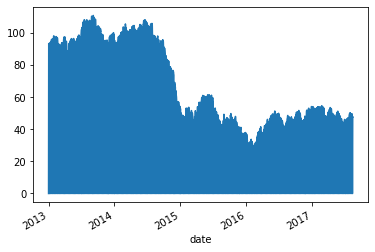

In [71]:
df.groupby('date')['dcoilwtico'].first().plot(kind='line')

In [77]:
oil_df = df.groupby('date')['dcoilwtico'].first().to_frame().reset_index()
oil_df

,date,dcoilwtico
0,2013-01-01,0.00
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,0.00
...,...,...
1679,2017-08-11,48.81
1680,2017-08-12,0.00
1681,2017-08-13,0.00
1682,2017-08-14,47.59


In [78]:
oil_df['date'].nunique()

1684

In [80]:
oil_df['oil_7d_moving_avg'] = oil_df['dcoilwtico'].rolling(7).mean()
oil_df

,date,dcoilwtico,oil_7d_moving_avg
0,2013-01-01,0.00,NaN
1,2013-01-02,93.14,NaN
2,2013-01-03,92.97,NaN
3,2013-01-04,93.12,NaN
4,2013-01-05,0.00,NaN
...,...,...,...
1679,2017-08-11,48.81,35.054286
1680,2017-08-12,0.00,35.054286
1681,2017-08-13,0.00,35.054286
1682,2017-08-14,47.59,34.800000


In [82]:
oil_df['oil_7d_moving_avg'].fillna(0, inplace=True)

In [87]:
oil_df.drop(columns='dcoilwtico', inplace=True)

In [88]:
oil_df

,date,oil_7d_moving_avg
0,2013-01-01,0.000000
1,2013-01-02,0.000000
2,2013-01-03,0.000000
3,2013-01-04,0.000000
4,2013-01-05,0.000000
...,...,...
1679,2017-08-11,35.054286
1680,2017-08-12,35.054286
1681,2017-08-13,35.054286
1682,2017-08-14,34.800000


In [90]:
# merge to df
df = df.merge(oil_df, how='left', on='date')
df

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay,Is_disaster,oil_7d_moving_avg
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,None,False,2017,8,15,1,0,1,0,34.585714
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,None,False,2017,8,15,1,0,1,0,34.585714
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,None,False,2017,8,15,1,0,1,0,34.585714
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,None,False,2017,8,15,1,0,1,0,34.585714


## Label Encoding

LabelEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [91]:
df.isna().any()

id                       False
date                     False
store_nbr                False
family                   False
sales                    False
onpromotion              False
city                     False
state                    False
store_type               False
cluster                  False
transactions             False
dcoilwtico               False
holiday_type             False
locale                   False
locale_name              False
description              False
transferred              False
Year                     False
Month                    False
Day                      False
DayofWeek                False
Is_Holiday_Celebrated    False
Is_PayDay                False
Is_disaster              False
oil_7d_moving_avg        False
dtype: bool

In [92]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay,Is_disaster,oil_7d_moving_avg
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,Primer dia del ano,False,2013,1,1,1,1,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,None,False,2017,8,15,1,0,1,0,34.585714
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,None,False,2017,8,15,1,0,1,0,34.585714
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,None,False,2017,8,15,1,0,1,0,34.585714
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,None,False,2017,8,15,1,0,1,0,34.585714


In [93]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
# le.fit(df)

In [94]:
cols = list(df.select_dtypes(include=[object, bool]).columns)

In [95]:
cols

['family',
 'city',
 'state',
 'store_type',
 'holiday_type',
 'locale',
 'locale_name',
 'description',
 'transferred']

In [96]:
df[cols] = df[cols].apply(le.fit_transform)

In [97]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay,Is_disaster,oil_7d_moving_avg
0,0,2013-01-01,1,0,0.000,0,18,12,3,13,...,51,0,2013,1,1,1,1,0,0,0.000000
1,1,2013-01-01,1,1,0.000,0,18,12,3,13,...,51,0,2013,1,1,1,1,0,0,0.000000
2,2,2013-01-01,1,2,0.000,0,18,12,3,13,...,51,0,2013,1,1,1,1,0,0,0.000000
3,3,2013-01-01,1,3,0.000,0,18,12,3,13,...,51,0,2013,1,1,1,1,0,0,0.000000
4,4,2013-01-01,1,4,0.000,0,18,12,3,13,...,51,0,2013,1,1,1,1,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,28,438.133,0,18,12,1,6,...,49,0,2017,8,15,1,0,1,0,34.585714
3008771,3000884,2017-08-15,9,29,154.553,1,18,12,1,6,...,49,0,2017,8,15,1,0,1,0,34.585714
3008772,3000885,2017-08-15,9,30,2419.729,148,18,12,1,6,...,49,0,2017,8,15,1,0,1,0,34.585714
3008773,3000886,2017-08-15,9,31,121.000,8,18,12,1,6,...,49,0,2017,8,15,1,0,1,0,34.585714


In [98]:
df['holiday_type'].unique()

array([3, 4, 6, 0, 2, 5, 1])

## testing for pivot

In [105]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'store_type', 'cluster', 'transactions', 'dcoilwtico',
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred',
       'Year', 'Month', 'Day', 'DayofWeek', 'Is_Holiday_Celebrated',
       'Is_PayDay', 'Is_disaster', 'oil_7d_moving_avg'],
      dtype='object')

In [111]:
holidays_check=df.groupby('date')['holiday_type'].nunique().to_frame().reset_index()

In [113]:
holidays_check[holidays_check['holiday_type']==holidays_check['holiday_type'].max()]

,date,holiday_type
1297,2016-07-24,3


In [114]:
df[df['date']=='2016-07-24']

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,description,transferred,Year,Month,Day,DayofWeek,Is_Holiday_Celebrated,Is_PayDay,Is_disaster,oil_7d_moving_avg
2318745,2311254,2016-07-24,1,0,10.000,0,18,12,3,13,...,49,0,2016,7,24,6,0,0,0,31.742857
2318746,2311255,2016-07-24,1,1,0.000,0,18,12,3,13,...,49,0,2016,7,24,6,0,0,0,31.742857
2318747,2311256,2016-07-24,1,2,1.000,0,18,12,3,13,...,49,0,2016,7,24,6,0,0,0,31.742857
2318748,2311257,2016-07-24,1,3,815.000,4,18,12,3,13,...,49,0,2016,7,24,6,0,0,0,31.742857
2318749,2311258,2016-07-24,1,4,0.000,0,18,12,3,13,...,49,0,2016,7,24,6,0,0,0,31.742857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320786,2313031,2016-07-24,9,28,505.495,1,18,12,1,6,...,49,0,2016,7,24,6,0,0,0,31.742857
2320787,2313032,2016-07-24,9,29,88.804,1,18,12,1,6,...,49,0,2016,7,24,6,0,0,0,31.742857
2320788,2313033,2016-07-24,9,30,1829.684,2,18,12,1,6,...,49,0,2016,7,24,6,0,0,0,31.742857
2320789,2313034,2016-07-24,9,31,4.000,0,18,12,1,6,...,49,0,2016,7,24,6,0,0,0,31.742857


## Feature selection

#### By correlation

<AxesSubplot:>

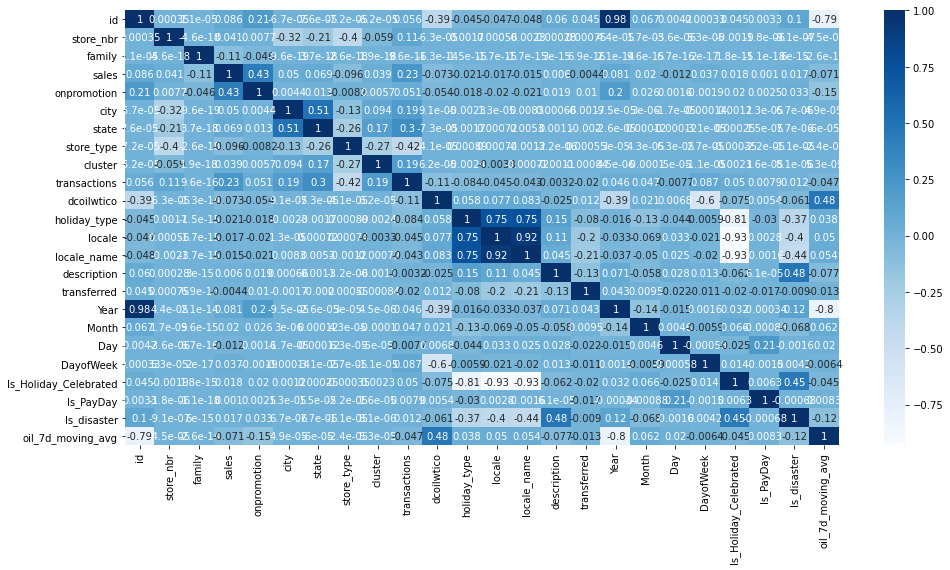

In [104]:
import seaborn as sb
import matplotlib.pyplot as plt

corr = df.corr(method='pearson')
plt.figure(figsize = (16,8))
sb.heatmap(corr, cmap="Blues", annot=True)